# Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # For Data Visualization


## Importing the dataset

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/ml lab work/50_Startups.csv')
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:,-1].values
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

# Encoding categorical data

In [ ]:
dummy_df = pd.get_dummies(dataset)
dummy_df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


## Splitting the dataset into the Training set and Test set

In [ ]:
# pd.get_dummies(dataset, drop_first=True)



In [ ]:
X = dummy_df.drop(['Profit'],axis=1)
y = dummy_df['Profit']

print('shape of X = ',X.shape )
print('shape of y = ',y.shape )

shape of X =  (50, 6)
shape of y =  (50,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 51)

In [ ]:
print(X_train)

    R&D Spend  Administration  ...  State_Florida  State_New York
26   75328.87       144135.98  ...              1               0
14  119943.24       156547.42  ...              1               0
12   93863.75       127320.38  ...              1               0
3   144372.41       118671.85  ...              0               1
11  100671.96        91790.61  ...              0               0
18   91749.16       114175.79  ...              1               0
46    1315.46       115816.21  ...              1               0
34   46426.07       157693.92  ...              0               0
33   55493.95       103057.49  ...              1               0
22   73994.56       122782.75  ...              1               0
8   120542.52       148718.95  ...              0               1
24   77044.01        99281.34  ...              0               1
45    1000.23       124153.04  ...              0               1
7   130298.13       145530.06  ...              1               0
40   28754

In [ ]:
print(y_train)

26    105733.54
14    132602.65
12    141585.52
3     182901.99
11    144259.40
18    124266.90
46     49490.75
34     96712.80
33     96778.92
22    110352.25
8     152211.77
24    108552.04
45     64926.08
7     155752.60
40     78239.91
13    134307.35
1     191792.06
25    107404.34
6     156122.51
10    146121.95
38     81229.06
27    105008.31
35     96479.51
36     90708.19
20    118474.03
28    103282.38
43     69758.98
42     71498.49
49     14681.40
41     77798.83
30     99937.59
21    111313.02
16    126992.93
5     156991.12
9     149759.96
32     97427.84
37     89949.14
Name: Profit, dtype: float64


In [ ]:
print(X_test)

    R&D Spend  Administration  ...  State_Florida  State_New York
4   142107.34        91391.77  ...              1               0
48     542.05        51743.15  ...              0               1
47       0.00       135426.92  ...              0               0
15  114523.61       122616.84  ...              0               1
0   165349.20       136897.80  ...              0               1
17   94657.16       145077.58  ...              0               1
29   65605.48       153032.06  ...              0               1
31   61136.38       152701.92  ...              0               1
19   86419.70       153514.11  ...              0               1
2   153441.51       101145.55  ...              1               0
23   67532.53       105751.03  ...              1               0
39   38558.51        82982.09  ...              0               0
44   22177.74       154806.14  ...              0               0

[13 rows x 6 columns]


In [ ]:
print(y_test)

4     166187.94
48     35673.41
47     42559.73
15    129917.04
0     192261.83
17    125370.37
29    101004.64
31     97483.56
19    122776.86
2     191050.39
23    108733.99
39     81005.76
44     65200.33
Name: Profit, dtype: float64


## Feature Scaling (Write appropriate code for feature scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train,y_train)

# sc = StandardScaler()
# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
print(X_train)

    R&D Spend  Administration  ...  State_Florida  State_New York
26   75328.87       144135.98  ...              1               0
14  119943.24       156547.42  ...              1               0
12   93863.75       127320.38  ...              1               0
3   144372.41       118671.85  ...              0               1
11  100671.96        91790.61  ...              0               0
18   91749.16       114175.79  ...              1               0
46    1315.46       115816.21  ...              1               0
34   46426.07       157693.92  ...              0               0
33   55493.95       103057.49  ...              1               0
22   73994.56       122782.75  ...              1               0
8   120542.52       148718.95  ...              0               1
24   77044.01        99281.34  ...              0               1
45    1000.23       124153.04  ...              0               1
7   130298.13       145530.06  ...              1               0
40   28754

In [ ]:
print(X_test)

    R&D Spend  Administration  ...  State_Florida  State_New York
4   142107.34        91391.77  ...              1               0
48     542.05        51743.15  ...              0               1
47       0.00       135426.92  ...              0               0
15  114523.61       122616.84  ...              0               1
0   165349.20       136897.80  ...              0               1
17   94657.16       145077.58  ...              0               1
29   65605.48       153032.06  ...              0               1
31   61136.38       152701.92  ...              0               1
19   86419.70       153514.11  ...              0               1
2   153441.51       101145.55  ...              1               0
23   67532.53       105751.03  ...              1               0
39   38558.51        82982.09  ...              0               0
44   22177.74       154806.14  ...              0               0

[13 rows x 6 columns]


## Training the Logistic Regression model on the Training set

In [ ]:
y_train

26    105733.54
14    132602.65
12    141585.52
3     182901.99
11    144259.40
18    124266.90
46     49490.75
34     96712.80
33     96778.92
22    110352.25
8     152211.77
24    108552.04
45     64926.08
7     155752.60
40     78239.91
13    134307.35
1     191792.06
25    107404.34
6     156122.51
10    146121.95
38     81229.06
27    105008.31
35     96479.51
36     90708.19
20    118474.03
28    103282.38
43     69758.98
42     71498.49
49     14681.40
41     77798.83
30     99937.59
21    111313.02
16    126992.93
5     156991.12
9     149759.96
32     97427.84
37     89949.14
Name: Profit, dtype: float64

In [ ]:
# from sklearn import preprocessing
# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(y_train)
# encoded
y_train

26    105733.54
14    132602.65
12    141585.52
3     182901.99
11    144259.40
18    124266.90
46     49490.75
34     96712.80
33     96778.92
22    110352.25
8     152211.77
24    108552.04
45     64926.08
7     155752.60
40     78239.91
13    134307.35
1     191792.06
25    107404.34
6     156122.51
10    146121.95
38     81229.06
27    105008.31
35     96479.51
36     90708.19
20    118474.03
28    103282.38
43     69758.98
42     71498.49
49     14681.40
41     77798.83
30     99937.59
21    111313.02
16    126992.93
5     156991.12
9     149759.96
32     97427.84
37     89949.14
Name: Profit, dtype: float64

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
X_train, y_train = make_blobs(n_samples=100, centers=5, n_features=10)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predicting a new result

In [ ]:
#y_pred = classifier.predict(X_test)
#y_pred

In [ ]:
y_test

4     166187.94
48     35673.41
47     42559.73
15    129917.04
0     192261.83
17    125370.37
29    101004.64
31     97483.56
19    122776.86
2     191050.39
23    108733.99
39     81005.76
44     65200.33
Name: Profit, dtype: float64

## Visualising the Training set results

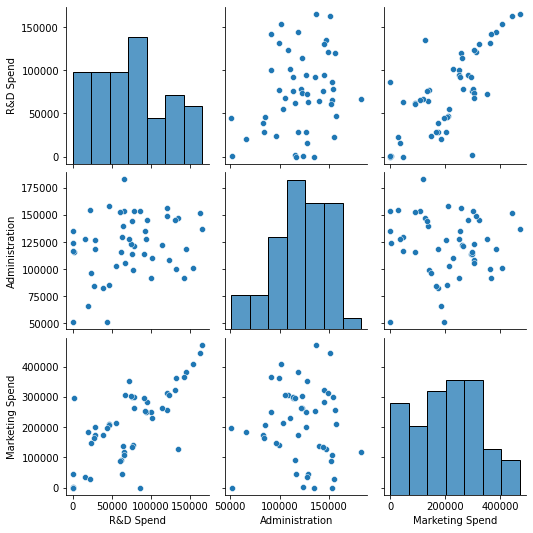

In [ ]:

sns.pairplot(dummy_df, vars = ['R&D Spend', 'Administration','Marketing Spend'])